In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
!python -m spacy download en_core_web_lg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.9 MB/s eta 0:00:00:00:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
data=pd.read_csv(r'/kaggle/input/ecommerce/data.csv')

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19662 entries, 0 to 19661
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product_ID      19662 non-null  int64 
 1   Category        19662 non-null  object
 2   Subcategory1    19662 non-null  object
 3   SubCategory2    19662 non-null  object
 4   Location        19662 non-null  object
 5   Channel         19662 non-null  object
 6   Customer_Age    19662 non-null  int64 
 7   Review_Title    19662 non-null  object
 8   Review_Text     19662 non-null  object
 9   Rating          19662 non-null  int64 
 10  Recommend_Flag  19662 non-null  int64 
 11  sentiment       19662 non-null  object
dtypes: int64(4), object(8)
memory usage: 1.8+ MB


In [5]:
data.Review_Text.values[2]

'This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!'

In [29]:
data.dropna(inplace=True)

In [7]:
#Finding the highest rated product and lowest one
highest=pd.DataFrame(data.groupby(['Rating','Subcategory1'])['Product_ID'].count()).reset_index()

highest_rate=highest[highest['Rating']==5].sort_values(by='Product_ID',ascending=False).head(1)

lowest=pd.DataFrame(data.groupby(['Rating','Subcategory1'])['Product_ID'].count()).reset_index()

#lowest most rated product
lowest_rate=highest[highest['Rating']==1].sort_values(by='Product_ID',ascending=False).head(1)

print(highest_rate)

print(
    
)
print(lowest_rate)

    Rating Subcategory1  Product_ID
28       5         Tops        4719

   Rating Subcategory1  Product_ID
4       1         Tops         310


In [8]:
#most recomended product subcategory2
recommendation=pd.DataFrame(data[data.Recommend_Flag==1].groupby('SubCategory2')['Recommend_Flag'].count()).reset_index().sort_values(by='Recommend_Flag',ascending=False).head(6)

<BarContainer object of 6 artists>

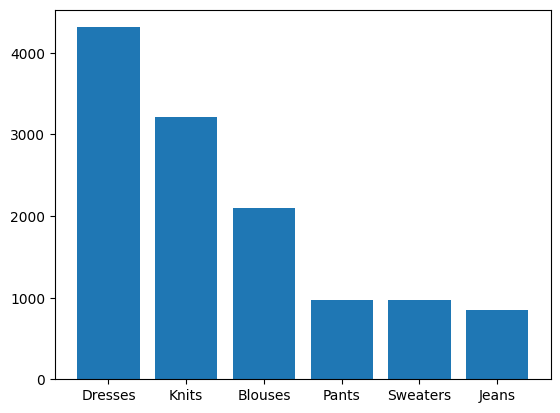

In [9]:
#top 6 most recomended products
plt.Figure(figsize=(15,9))
plt.bar(recommendation.SubCategory2,recommendation.Recommend_Flag)

### partition of the ratings by positive and negative reviwes

In [4]:
nlp = spacy.load("en_core_web_lg")

In [5]:
#creating the function that tokenize and lemmatise the words and remove the stop words
def clean_text( text):
    doc = nlp(text)
    clean_text = ''
    for i in doc:
        if not i.is_stop and not i.is_punct and not i.is_space:
            clean_text+=i.lemma_+' '
    clean_text=clean_text.strip()
    return clean_text

In [ ]:
data['Review_Text']=data.Review_Text.apply(clean_text)

In [ ]:
Review_Title=data['Review_Title'].apply(clean_text)

In [ ]:
data['Review_Title']=Review_Title

In [13]:
data.Review_Text[2]

'This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!'

In [23]:
data.Review_Text[3]

'love tracy reese dress petite 5 foot tall usually wear 0p brand dress pretty package lot dress skirt long overwhelm small frame stranger alteration shorten narrow skirt away embellishment garment love color idea style work return dress'

In [260]:
#importing the transformers module
from transformers import pipeline
import warnings
warnings.filterwarnings('ignore')

In [261]:
sentiment=pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [262]:
type_of_sentiment=[]
for i in range(0,19661):
    type_of_sentiment.append(sentiment(data.Review_Text[i])[0]['label'])

In [100]:
data['sentiment']=type_of_sentiment

In [103]:
#partioning the data reviews into positive and negative sentiments
postive_sentiment=data[data['sentiment']=='POSITIVE']
negative_sentiment=data[data['sentiment']=='NEGATIVE']

In [ ]:
#creating the world cloud for positive and negative reviews

In [204]:
#creating the world cloud 
positive_words=''
for i in positive_sentiment.Review_Text:
    i=str(i)
    i=i.split()
    positive_words+=' '.join(i)+' '

In [205]:
negative_words=''
for i in negative_sentiment.Review_Text:
    i=str(i)
    i=i.split()
    negative_words+=' '.join(i)+' '

In [264]:
from wordcloud import WordCloud
from collections import Counter

In [ ]:
ng=[words for words in negative_sentiment.Review_Text.str.split()]
ps=[token for token in positive_sentiment.Review_Text.str.split()]

In [265]:
fng=[i for j in ng for i in j]
fps=[x for y in ps for x in y]

In [267]:
negative_wrd_count=Counter(fng)
positive_wrd_count=Counter(fps)

In [278]:
positive_wrd_count=positive_wrd_count.most_common(10)
negative_wrd_count=negative_wrd_count.most_common(10)

In [212]:
p_words,p_count=zip(*positive_wrd_count)
n_words,n_count=zip(*negative_wrd_count)

In [213]:
#visualising the words clouds 
pstv_wc=WordCloud(width = 800,height = 800).generate(str(p_words))
negt_wc=WordCloud(width = 800,height = 800).generate(str(n_words))


The most of the postive sentiments were coming with the praise of loving and appreciating the quality and appeal of the clothes

Whereas, most of the negative sentiments are about the sizes. The clothes were not fitting as they wished and it is not upto thier satisfaction.

 Understand sentiment among the customers on the different categories, sub categories, 
products by location and age group


In [50]:
data=pd.concat([positive_sentiment,negative_sentiment])

In [177]:
#Finding the response to the category of the products by the customers by Location
sentiment_by_loc=pd.DataFrame(data.groupby(['Location','sentiment'])['Category'].count())
sentiment_by_loc=data.pivot_table(index='Location', columns='sentiment', values='Category', aggfunc='count')
#The most of the response to the overall products are positive with majority of the consumers
#are giving postive remarks. We should provide better services to the customers of the 
#Mumbai and Gurgaon
sentiment_by_loc

sentiment,NEGATIVE,POSITIVE
Location,,
Bangalore,1476,2929
Chennai,645,1314
Gurgaon,2421,4940
Mumbai,2008,3929


In [70]:
#understanding the response given to the categories of the product by different age groups

#creating the age group
data['demography']=np.where((data.Customer_Age>30) & (data.Customer_Age<51),'30-50',
np.where((data.Customer_Age>50) & (data.Customer_Age<76),'50-75',
        np.where(data.Customer_Age<75,'>75','<30')))

In [180]:
sentiment_by_demography=data.pivot_table(index='demography',columns='sentiment',values='Category',aggfunc=('count'))
sentiment_by_demography

sentiment,NEGATIVE,POSITIVE
demography,,
30-50,3926,7618
50-75,1673,3495
<30,32,112
>75,919,1887


The products are more reviwed by the customers who are age of around 30-75 than the rest of the demography. People of the said demographies has the mixed feelings on the category of the products. Hence, we should focus on providing the satisfactory goods and services to these.

In [244]:
#looking at the sentiments for the Subcategory 2
sentiment_by_subcategory=pd.DataFrame(data.groupby(['sentiment','SubCategory2'])['SubCategory2'].count().unstack().dropna(axis=1)).T
sentiment_by_subcategory


sentiment,NEGATIVE,POSITIVE
SubCategory2,,
Blouses,900.0,1687.0
Dresses,1758.0,3613.0
Fine gauge,303.0,624.0
Intimates,33.0,87.0
Jackets,183.0,415.0
Jeans,373.0,597.0
Knits,1323.0,2658.0
Layering,45.0,70.0
Legwear,42.0,89.0


In [234]:
sentiment_by_channel=pd.crosstab(data.sentiment,data.Channel).T
sentiment_by_channel

sentiment,NEGATIVE,POSITIVE
Channel,,
Mobile,2665,5606
Web,3885,7506


In [202]:
sentiment_by_cat=pd.DataFrame(data.groupby('sentiment')['Category'].count())
sentiment_by_cat

,Category
sentiment,
NEGATIVE,6550
POSITIVE,13112


The customers are positive over the products across diferrent locations. Mumbai and Gurgaon, where most of the reviews are concentrated on Tops and Dresses suggests that the these products are seeling well.

Perform predictive analytics to understand the drivers of customers who are recommending 
the products.

In [ ]:
# We need to clean the data and select only relevant data

In [114]:
x=data[['Category','Subcategory1','SubCategory2','Location','Channel','Customer_Age','Rating']]

In [87]:
y=data.Recommend_Flag

In [100]:
#importing the required libraries
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [115]:
cat_lbl=LabelEncoder()
x.Category=cat_lbl.fit_transform(x.Category)

In [116]:
suba=LabelEncoder()
x.Subcategory1=suba.fit_transform(x.Subcategory1)

x.SubCategory2=suba.fit_transform(x.SubCategory2)

x.Channel=suba.fit_transform(x.Channel)

x.Location=suba.fit_transform(x.Location)

In [124]:
#splitting the dataset into training and testing data
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2)

In [119]:
gbc=GradientBoostingClassifier()

In [125]:
model=gbc.fit(xtr,ytr)

In [130]:
accuracy_test=model.predict(xte)
accuracy_train=model.predict(xtr)

In [131]:
#finding the accuracy score for test data
print(f'The accuracy score for testing data is {accuracy_score(yte,accuracy_test)}')

The accuracy score for trainig data is 0.935163996948894


In [134]:
#finding the accuracy score for training data
print(f'The accuracy score for training data is {accuracy_score(ytr,accuracy_train)}')

The accuracy score for training data is 0.9375039735520376


Based on the accuracy score of the both training and testing data, the model is performing very well

#Finding the factors that are driving the customers for recommending the products to others

In [140]:
feature_importance=model.feature_importances_

In [143]:
for feature, importance in zip(x.columns, feature_importance):
    print(f'{feature}: {importance:.4f}')

Category: 0.0002
Subcategory1: 0.0009
SubCategory2: 0.0010
Location: 0.0004
Channel: 0.0003
Customer_Age: 0.0044
Rating: 0.9928


The ratings are the key drive force for the customers to recommend the product to thier freinds and the damily

In [4]:
#Create topics and understand themes behind the topics by performing topic mining.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [13]:
vector=TfidfVectorizer()

In [105]:
model=vector.fit_transform(data.Review_Text)

In [106]:
#checking the output
feature=vector.get_feature_names_out()
print(feature)

['00' '00p' '02' ... 'zoom' 'zuma' 'â¼ber']


In [107]:
#checking the vector
tfidf_form=model.toarray()
print(tfidf_form)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [108]:
tfidf=pd.DataFrame(tfidf_form,columns=feature)

In [33]:
truncat=TruncatedSVD(n_components=10,n_iter=50,random_state=2)

In [35]:
final_truncat=truncat.fit_transform(tfidf)

In [71]:

values=truncat.components_.T


In [75]:
lsa_values=pd.DataFrame(data=values,index=feature,columns=[f'latent_{i}' for i in range(10)])

In [89]:
topic=lsa_values.latent_0.sort_values(ascending=False)
topic=topic[:10]

<BarContainer object of 10 artists>

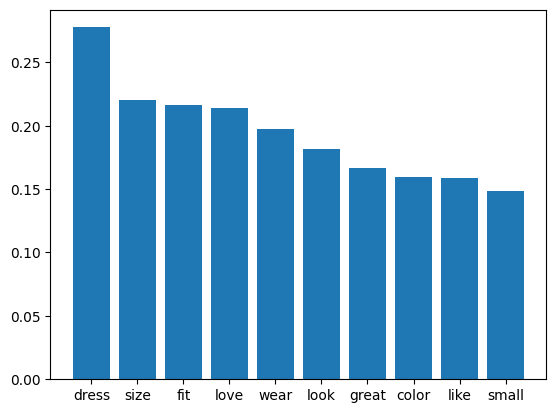

In [90]:
plt.bar(topic.index,topic)

The people most talked about the dress products and generally they loved our products.
Also about its fittings, appearance..etc

In [117]:
#importing support vector machine
#reducing the dimensions using PCA
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [133]:
decompose=PCA(n_components=30)
pca_decomposed=decompose.fit_transform(tfidf)


pca=pd.DataFrame(data=pca_decomposed,index=tfidf.index,columns=[f'decompsed{i}' for i in range(30)])

In [135]:
#creating the ratings based on the reviews
tfidf_y=data['Rating']


#spliting the data for training and testing
tfidf_xtr,tfidf_xte,tfidf_ytr,tfidf_yte=train_test_split(pca,tfidf_y,test_size=0.2,random_state=2)


In [136]:
svc=SVC()
model_svc=svc.fit(tfidf_xtr,tfidf_ytr)

In [138]:
tfidf_xtr_pred=model_svc.predict(tfidf_xtr)

In [139]:
tfidf_xte_pred=model_svc.predict(tfidf_xte)

In [145]:
#checking the model's accuracy
print(f'Training accuracy {accuracy_score(tfidf_ytr,tfidf_xtr_pred)}')
print(f'Testing accuracy {accuracy_score(tfidf_yte,tfidf_xte_pred)}')


Training accuracy 0.6591646004196071
Testing accuracy 0.5936943808797356


In [146]:
#hyper_parameter tuning for the SVC
param={'C':[0.1,0.5,1,10],'gamma':['scale','auto'],'kernel':['linear','rbf','poly']}

In [147]:
#importing Gridsearch CV
from sklearn.model_selection import GridSearchCV

In [148]:
grid=GridSearchCV(svc,param_grid=param,cv=5,n_jobs=-1)

In [158]:
grid.fit(tfidf_xtr,tfidf_ytr)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [160]:
grid.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [162]:
#The Gridsearch VC's best paramater is same as the default parametrs.

In [163]:
#creating the dashboard out of EDA 

<ipython-input-256-1131655eb649>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2,0].set_xticklabels(sentiment_by_subcategory.index,rotation=90)


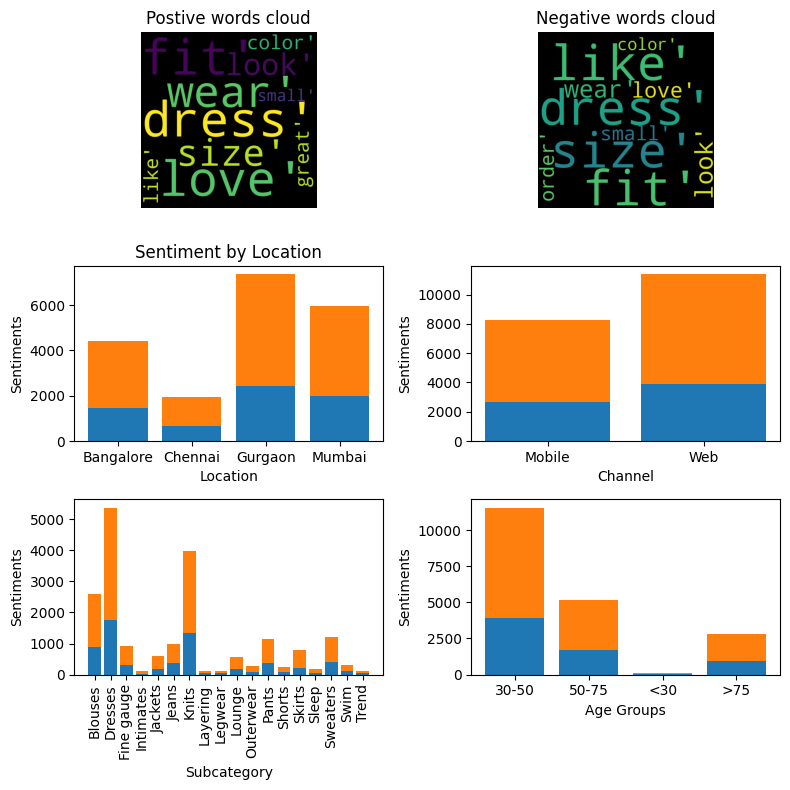

In [256]:
fig,axs=plt.subplots(3,2,figsize=(8,8))

axs[0,0].imshow(pstv_wc)
axs[0,0].axis('off')
axs[0,0].set_title('Postive words cloud')

axs[0,1].imshow(negt_wc)
axs[0,1].axis('off')
axs[0,1].set_title('Negative words cloud')

axs[1,0].bar(sentiment_by_loc.index,sentiment_by_loc['NEGATIVE'],label='Negative')
axs[1,0].bar(sentiment_by_loc.index,sentiment_by_loc['POSITIVE'],bottom=sentiment_by_loc['NEGATIVE'],label='Postive')
axs[1,0].set_title('Sentiment by Location')
axs[1,0].set_xlabel('Location')
axs[1,0].set_ylabel('Sentiments')

axs[1,1].bar(sentiment_by_channel.index,sentiment_by_channel['NEGATIVE'])
axs[1,1].bar(sentiment_by_channel.index,sentiment_by_channel['POSITIVE'],bottom=sentiment_by_channel['NEGATIVE'])
axs[1,1].set_xlabel('Channel')
axs[1,1].set_ylabel('Sentiments')


axs[2,0].bar(sentiment_by_subcategory.index,sentiment_by_subcategory['NEGATIVE'])
axs[2,0].bar(sentiment_by_subcategory.index,sentiment_by_subcategory['POSITIVE'],bottom=sentiment_by_subcategory['NEGATIVE'])
axs[2,0].set_xlabel('Subcategory')
axs[2,0].set_ylabel('Sentiments')
axs[2,0].set_xticklabels(sentiment_by_subcategory.index,rotation=90)

axs[2,1].bar(sentiment_by_demography.index,sentiment_by_demography['NEGATIVE'])
axs[2,1].bar(sentiment_by_demography.index,sentiment_by_demography['POSITIVE'],bottom=sentiment_by_demography['NEGATIVE'])
axs[2,1].set_xlabel('Age Groups')
axs[2,1].set_ylabel('Sentiments')


plt.tight_layout()
plt.show()